In [1]:
import numpy as np
from matplotlib import pyplot as plt
from collections import deque
%matplotlib notebook

In [2]:
def trim_begin_ending(data):
    begin_idx = np.min([np.argmax(data[:,1]>0),np.argmax(data[:,2]>0)])
    last_idx = len(data)-np.min([np.argmax(data[::-1,1]>0),np.argmax(data[::-1,2]>0)])
    data = data[begin_idx:last_idx]
    return data

def moving_median(X, window=5, avg_func=np.median):
    buffer = deque(maxlen=window)
    ret = []
    for x in X:
        buffer.append(x)
        ret.append(avg_func(buffer))
    return np.array(ret)

def add_removed_vals(data):
    ret = []
    last_ts = data[0,0]
    for d in data[1:]:
        if d[0] - last_ts:
            last_ts = d[0]
        

def plot_file(filename):
    data = np.loadtxt(open("../../wheelknife-data/"+filename, "rb"), delimiter=",", skiprows=1)
    data = trim_begin_ending(data)
    
    x = data[:,0]
    front = moving_median(data[:,1])
    back = moving_median(data[:,2])
    
    plt.figure(figsize=(9,3))
    plt.title(filename)
    plt.plot(x, front, c="green")
    plt.plot(x, back, c="red")
    plt.show()

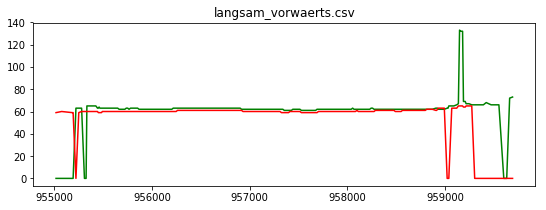

In [3]:
plot_file("langsam_vorwaerts.csv")

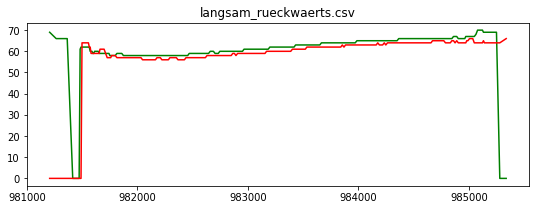

In [4]:
plot_file("langsam_rueckwaerts.csv")

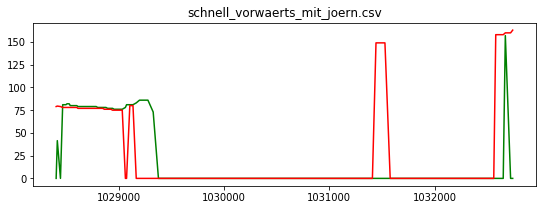

In [5]:
plot_file("schnell_vorwaerts_mit_joern.csv")

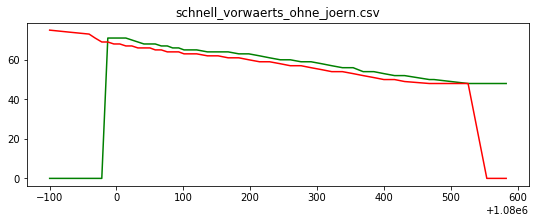

In [6]:
plot_file("schnell_vorwaerts_ohne_joern.csv")

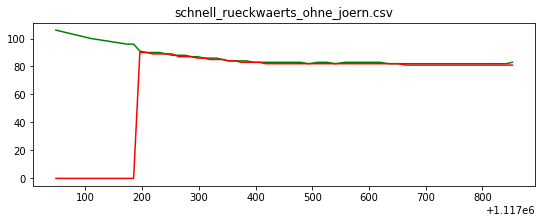

In [7]:
plot_file("schnell_rueckwaerts_ohne_joern.csv")

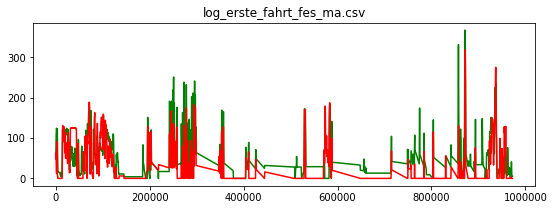

In [8]:
plot_file("log_erste_fahrt_fes_ma.csv")

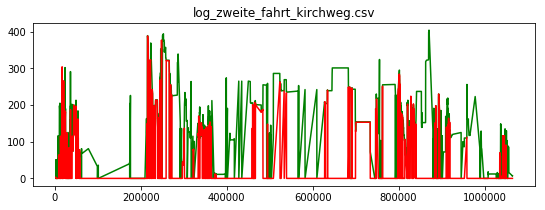

In [9]:
plot_file("log_zweite_fahrt_kirchweg.csv")